# GPT-4o

[Hello!](https://openai.com/index/hello-gpt-4o/)

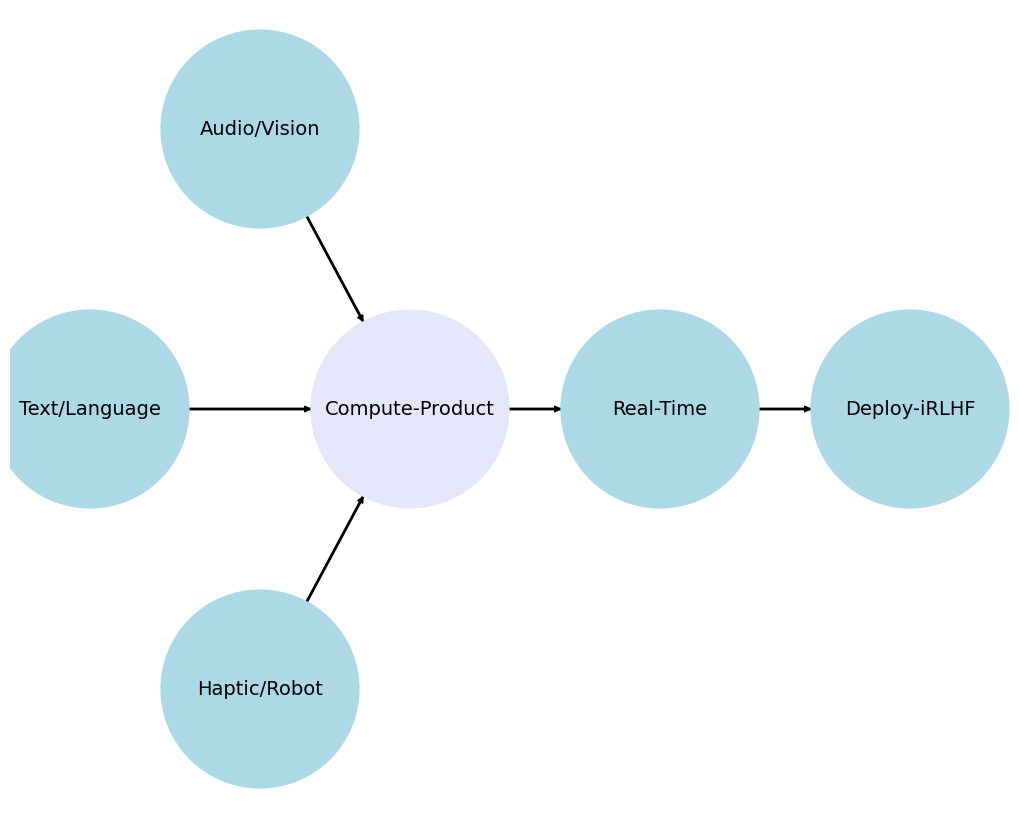

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("Audio", pos=(-2500, 700))
G.add_node("Text", pos=(-4200, 0))
G.add_node("Compute", pos=(-1000, 0))
G.add_node("Haptic", pos=(-2500, -700))
G.add_node("Real", pos=(1500, 0))
G.add_node("Deploy", pos=(4000, 0))

G.add_edges_from([("Audio", "Compute")])
G.add_edges_from([("Text", "Compute")])
G.add_edges_from([("Haptic", "Compute")])
G.add_edges_from([("Compute", "Real")])
G.add_edges_from([("Real", "Deploy")])

pos = nx.get_node_attributes(G, 'pos')
labels = {"Compute": "Compute-Product",
          "Audio": "Audio/Vision",
          "Text": "Text/Language",
          "Haptic": "Haptic/Robot",
          "Real": "Real-Time",
          "Deploy": "Deploy-iRLHF"}  # Added label for "NDI" node in the labels dictionary

# Update color for the "Scenarios" node
node_colors = ["lightblue","lightblue", "lavender", "lightblue", "lightblue", "lightblue"]
# node_colors = ["lightblue","lavender", "lavender", "lightgreen", "lightpink", "lightpink"]
# Suppress the deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=20000, node_color=node_colors, linewidths=2, edge_color='black', style='solid')
nx.draw_networkx_labels(G, pos, labels, font_size=14) # , font_weight='bold'
nx.draw_networkx_edges(G, pos, edge_color='black', style='solid', width=2)
plt.xlim(-5000, 5000)
plt.ylim(-1000, 1000)
plt.axis("off")
plt.show()

World!

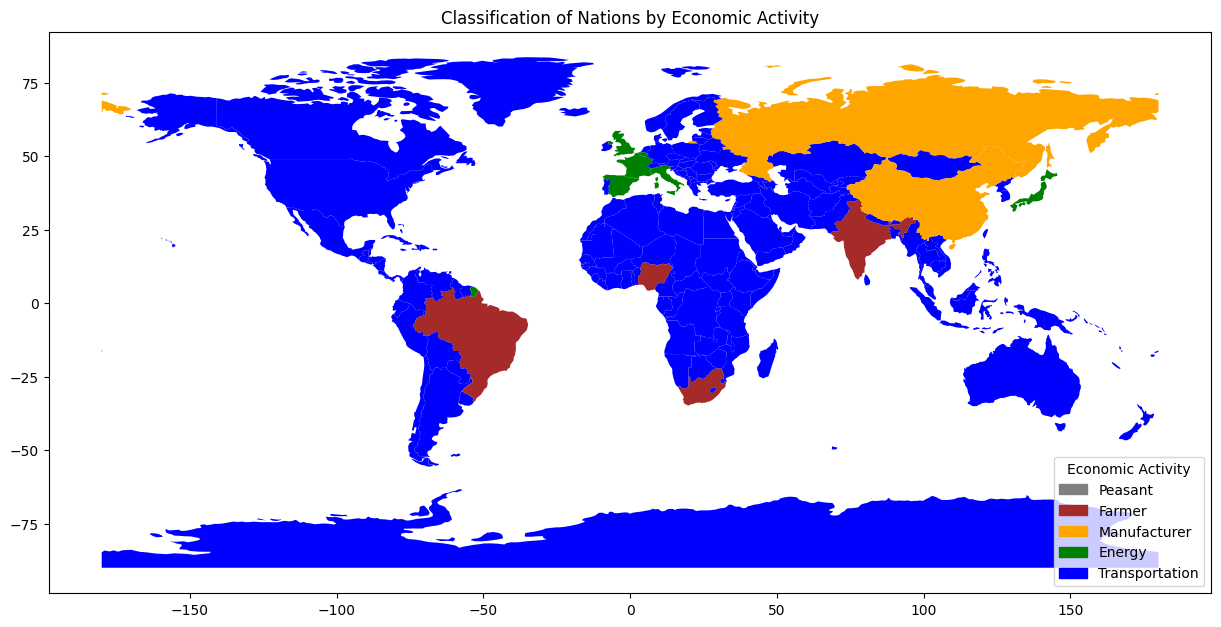

In [4]:
import geopandas as gpd
import pandas as pd
import warnings
import geopandas.datasets
import matplotlib.pyplot as plt

# Load the world map shapefile from the downloaded file
world_path = '~/documents/github/myenv/lib/python3.11/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'
world = gpd.read_file(world_path)

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# GDP per capita data (example data, actual values would vary)
gdp_per_capita = {
    'Austria': 52000, 'Belgium': 47500, 'Brazil': 9000, 'China': 11000,
    'France': 43000, 'Germany': 52000, 'India': 2000, 'Italy': 40000,
    'Japan': 42000, 'Nigeria': 2000, 'Russia': 11000, 'South Africa': 6500,
    'Spain': 31000, 'Switzerland': 82000, 'United Kingdom': 43000, 'United States': 62000
}

# Classify countries
def classify_gdp_per_capita(gdp):
    if gdp < 2000:
        return 'Peasant'
    elif 2000 <= gdp < 10000:
        return 'Farmer'
    elif 10000 <= gdp < 30000:
        return 'Manufacturer'
    elif 30000 <= gdp < 50000:
        return 'Energy'
    else:
        return 'Transportation'

world['Economic_Classification'] = world['name'].map(gdp_per_capita).apply(classify_gdp_per_capita)

# Define colors for each classification
colors = {
    'Peasant': 'gray',
    'Farmer': 'brown',
    'Manufacturer': 'orange',
    'Energy': 'green',
    'Transportation': 'blue'
}

# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color=world['Economic_Classification'].map(colors))

# Add a legend
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
labels = colors.keys()
ax.legend(handles, labels, title='Economic Activity', loc='lower right')

plt.title('Classification of Nations by Economic Activity')
plt.show()